In [64]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from pathlib import Path
import os
from sklearn.model_selection import train_test_split
import random
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [8]:
## downloading reuters dataset
nltk.download("reuters")

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\E14\AppData\Roaming\nltk_data...


True

In [9]:
## importing the reuters dataset
from nltk.corpus import reuters

In [46]:
## paths
SUMMARIES_PATH = Path("./summaries")

In [47]:
## creating necessary directories if they do not exist
if not os.path.exists(SUMMARIES_PATH):
    os.mkdir(SUMMARIES_PATH)

# Dataset EDA

In [ ]:
print(f"Reuters corpus has {len(reuters.fileids())} news articles")
print(f"Reuters corpus has {len(reuters.categories())} categories")

Reuters corpus has 10788 news articles
Reuters corpus has 90 categories


In [33]:
## getting documents in each
category_count_map = list()
for category in reuters.categories():
    docs_in_category = reuters.fileids(category)
    docs_count = len(docs_in_category)
    # category_count_map[category] = docs_count
    category_count_map.append((category, docs_count))

cat_doc_count_df=pd.DataFrame(category_count_map, columns=("category", " count"))
cat_doc_count_df

,category,count
0,acq,2369
1,alum,58
2,barley,51
3,bop,105
4,carcass,68
...,...,...
85,veg-oil,124
86,wheat,283
87,wpi,29
88,yen,59


In [48]:
## saving the category summary
cat_doc_count_df.to_csv(SUMMARIES_PATH/"category_count.csv", index=False)

In [60]:
def get_reuters_corpus_samples(sample_fraction=0.1, random_state=42):
    random.seed(random_state)        # for reproducibility

    # Collect samples while preserving category ratios
    data = []
    for category in reuters.categories():
        fileids = reuters.fileids(category)
        sample_size = max(1, int(len(fileids) * sample_fraction))
        sampled_ids = random.sample(fileids, sample_size)
        
        for fid in sampled_ids:
            data.append((category, fid))

    # Create DataFrame
    df = pd.DataFrame(data, columns=["category", "fileid"])

    return df

In [62]:
df = get_reuters_corpus_samples()

In [63]:
df

,category,fileid
0,acq,test/19297
1,acq,test/15995
2,acq,training/13085
3,acq,training/12053
4,acq,training/11477
...,...,...
1308,yen,training/9946
1309,yen,training/872
1310,zinc,training/7842
1311,zinc,training/14572


In [ ]:
## prorocessing text
nltk.download("stopwords") ## downloading stopwords if not already there
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("wordnet")
nltk.download("omw-1.4")


stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    
    # Lowercase, remove stopwords, and lemmatize
    processed = [
        lemmatizer.lemmatize(token.lower()) 
        for token in tokens 
        if token.isalpha() and token.lower() not in stop_words
    ]
    return processed

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\E14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\E14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\E14\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\E14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\E14\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['striped', 'bat', 'hanging', 'foot', 'best']


In [ ]:
def get_tokens(x):
    fileid = x["fileid"]
    doc_raw = reuters.raw(fileid)
    return preprocess_text(doc_raw)

df["text_tokenized"] = df.apply(get_tokens, axis=1)

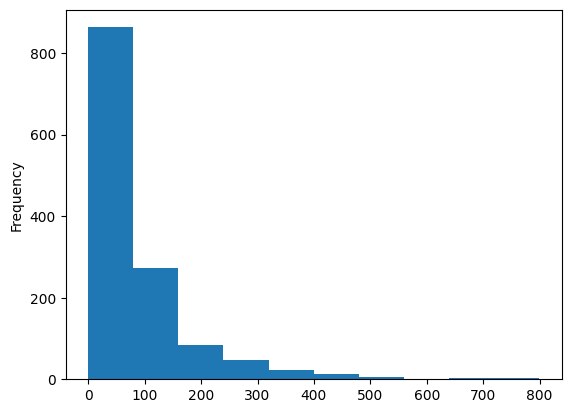

In [87]:
## showing distribution of documents lenghts
document_lengths = df["text_tokenized"].apply(len)

document_lengths.plot.hist()
plt.show()